In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os


In [2]:
#import data
df=pd.read_excel(r'D:\BreastCancerDetection\Dataset\df1.xlsx')

In [3]:
#first 5 rows of dataset
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Data Preprocessing

In [5]:
#shape of dataset
df.shape

(569, 32)

In [6]:
#check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#check null values
df.isnull()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#check nul values
df.isnull().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
#statistics of dataset
df.describe()

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# Data Visualization

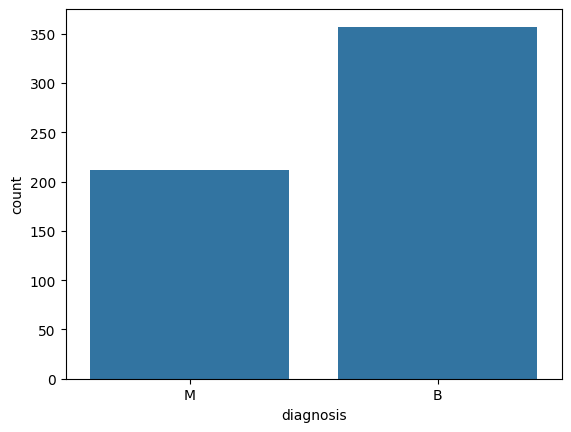

In [11]:
#countplot according to diagnosis
sns.countplot(x='diagnosis', data =df)
plt.show()

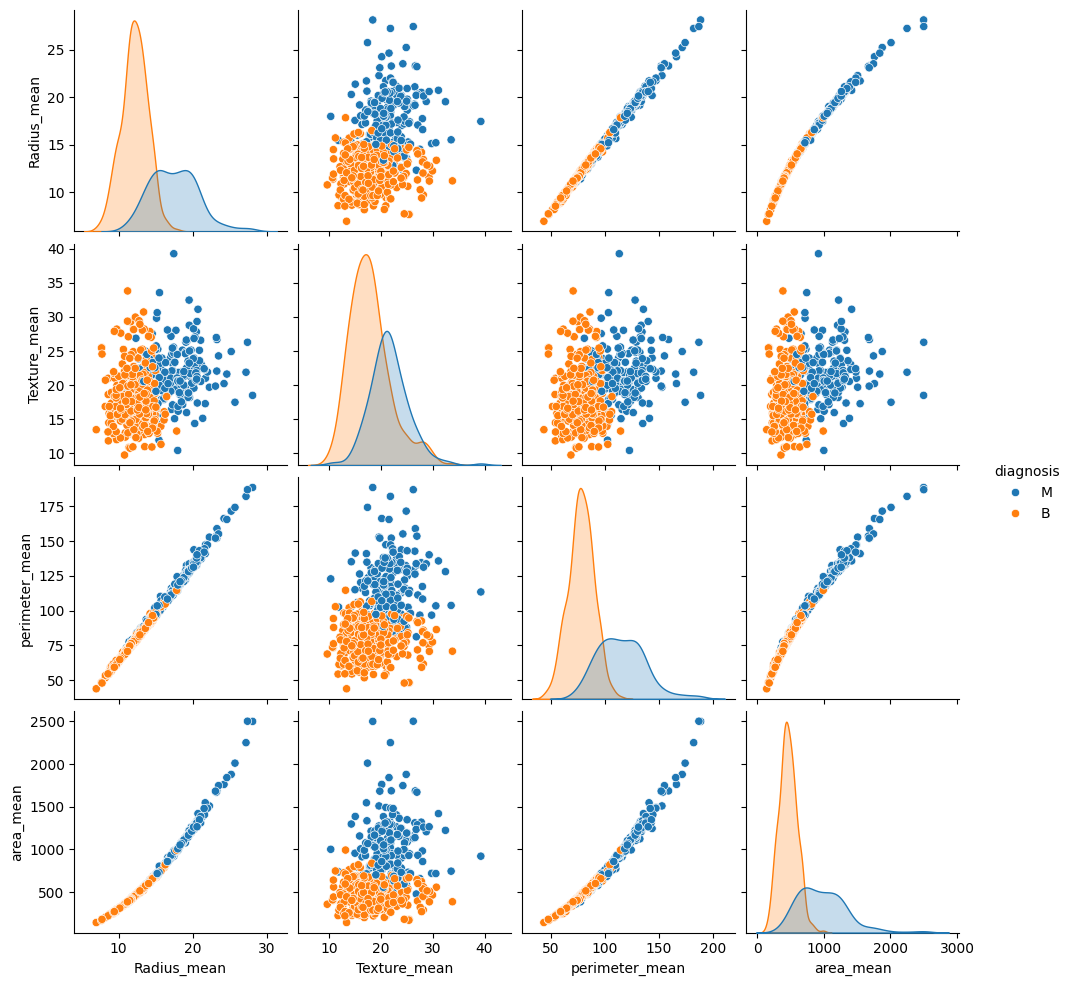

In [12]:
#pairplot according to diagnosis
sns.pairplot(df.iloc[:,1:6],hue="diagnosis")
plt.show()

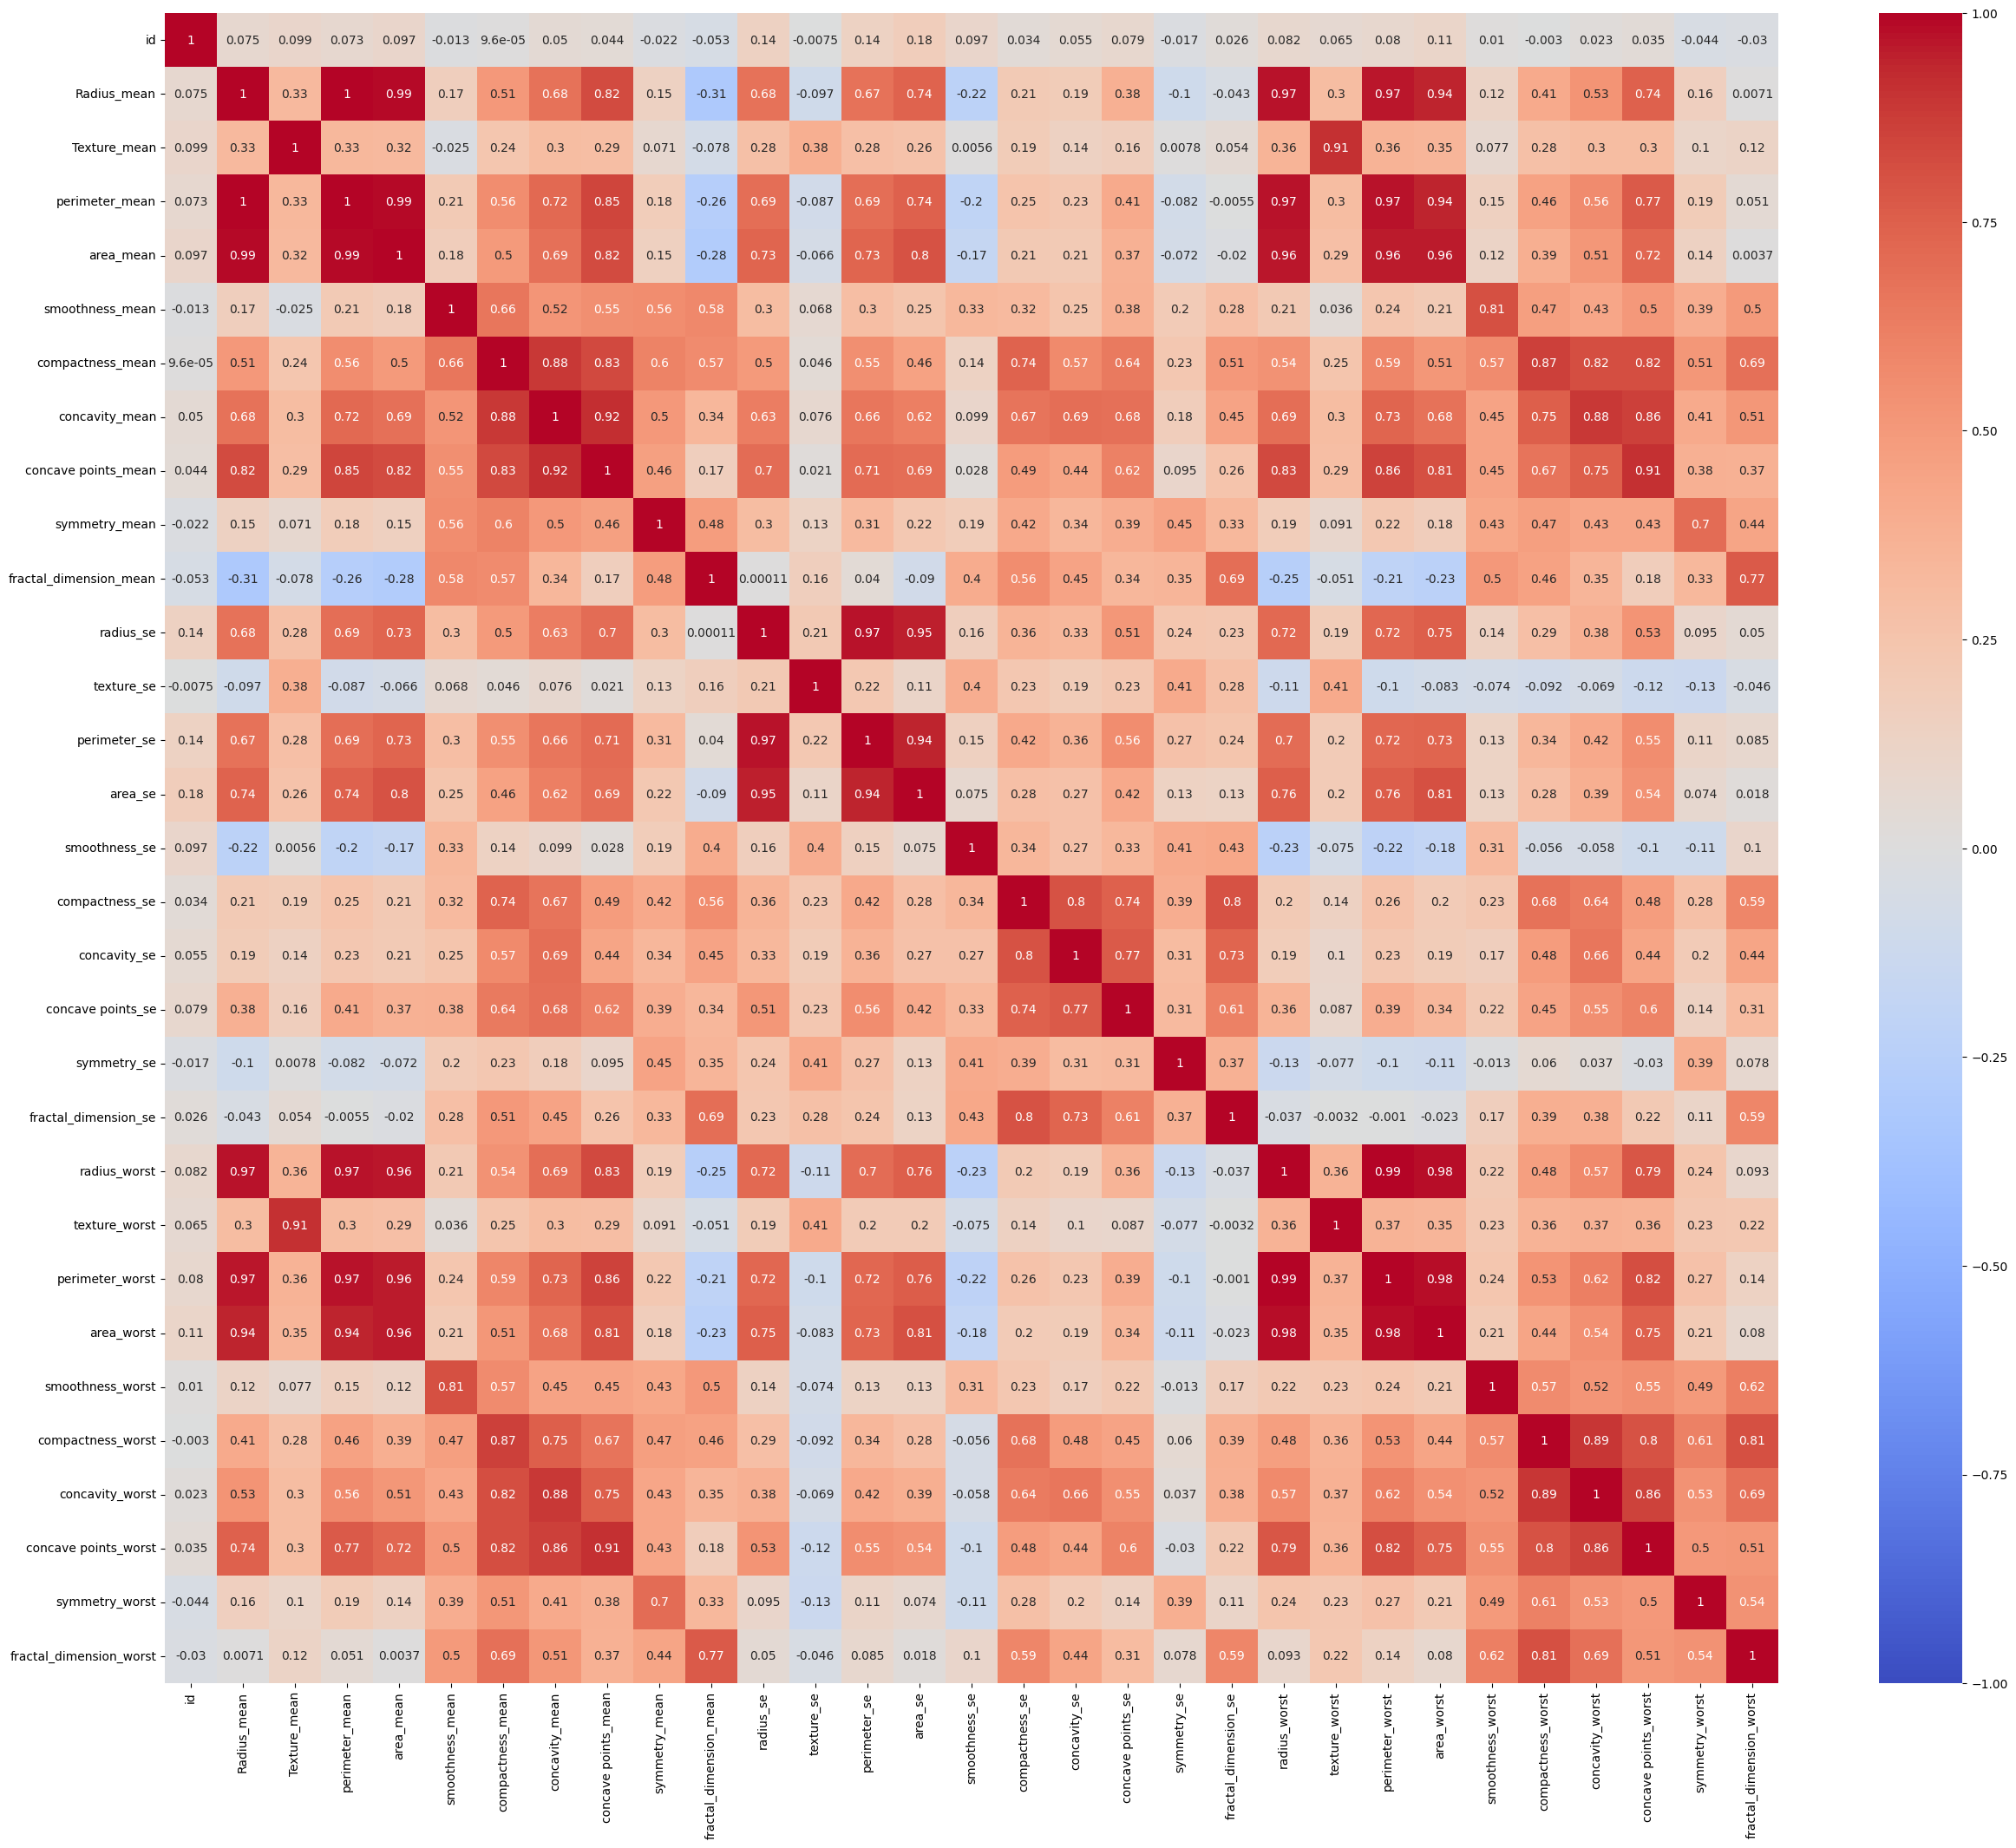

In [15]:
# Select only numeric columns from the dataframe
df_numeric = df.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(30, 25))
ax = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm')

# Show the heatmap
plt.show()


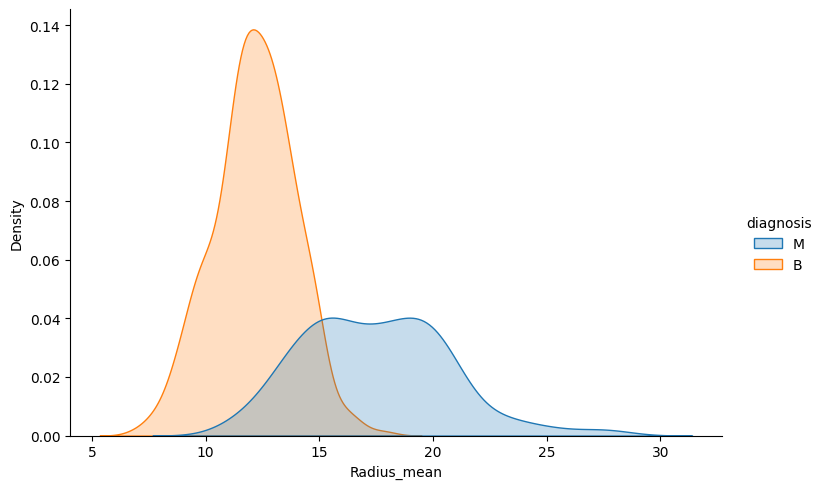

In [16]:
#normal distribution curve according to diagnosis
sns.displot(data=df,
            x='Radius_mean',
            hue='diagnosis',
            kind='kde',
            fill=True,
            height=5, aspect=1.5)

In [17]:
#count according to diagnosis
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [18]:
#whole mean data according to diagnosis
df.groupby(['diagnosis']).mean()

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.623774,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
# Define dependent and independent variables

In [19]:
#replace M as 1 and B as 0
df.replace({'diagnosis':{'M':1 , 'B':0}},inplace = True)

C:\Users\ranaa\AppData\Local\Temp\ipykernel_2108\2225823889.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'diagnosis':{'M':1 , 'B':0}},inplace = True)


In [20]:
#define dependent variable y and independent variable X
X = df.drop(columns={'diagnosis' , 'id'}, axis=1)
y = df['diagnosis']

In [21]:
#independent variable
X

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
#dependent variable
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
# Spilit training and testing dataset

In [23]:
#spilit traing and test dataset with 80% test size
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,  random_state = 1)


In [24]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [25]:
print(y.shape, y_train.shape, y_test.shape)

(569,) (455,) (114,)


# Using Decision Tree Classifier

In [26]:
#import decision tree classifier library and fit the dataset
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()
classifier.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [27]:
#check accuracy
classifier.score(X_test, y_test)

0.9122807017543859

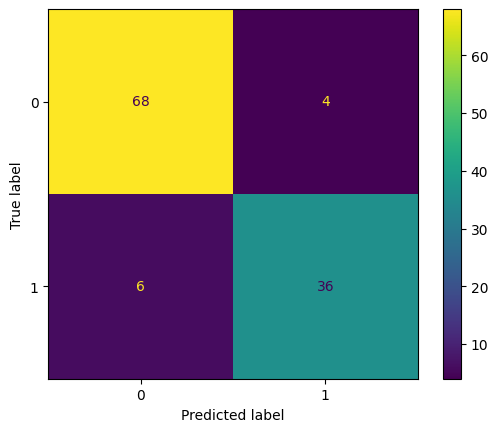

In [28]:
#import confusion matrix library and make confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [29]:
# Prediction


#take x variable and convert into numpy array
patient1 = np.array([7.76,
                     24.54, 
                     47.92,
                     181.0,
                     0.05263,
                     0.04362,
                     0.00000,
                     0.00000,
                     0.1587,
                     0.05884,
                     0.3857,
                     1.428,
                     2.548,
                     19.15,
                     0.007189,
                     0.00466,
                     0,
                     0,
                     0.02676,
                     0.002783,
                     9.456,
                     30.37,
                     59.16,
                     268.6,
                     0.08996,
                     0.06444,
                     0.0000,
                     0.0000,
                     0.2871,
                     0.07039])

In [30]:
#reshape the prediction values and predict
pred = patient1.reshape(1,-1)
pred = classifier.predict(pred)
if pred == 0:
    print ('Patient has no cancer')
else:
    print ('Patient has cancer')

Patient has no cancer


c:\Users\ranaa\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Using Logistic Regression Classifier

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
classifier_lr = LogisticRegression(random_state = 0)

In [33]:
classifier_lr.fit(X_train, y_train)

c:\Users\ranaa\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [34]:
y_pred = classifier_lr.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score

In [36]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [37]:
results = pd.DataFrame([['Logistic Regression', acc,f1,prec,recall]],
                       columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [38]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.947368,0.928571,0.928571,0.928571


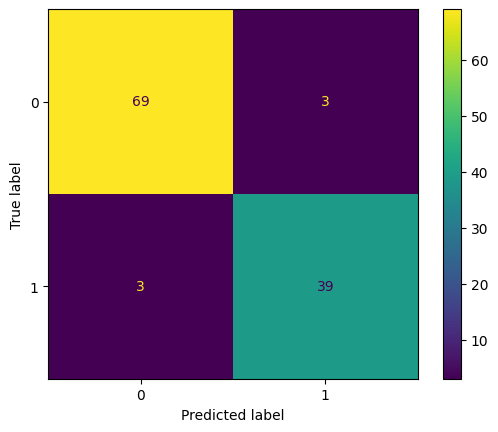

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [43]:
# Prediction


#take x variable and convert into numpy array
patient2 = np.array([10.76,
                     24.54, 
                     47.92,
                     181.0,
                     0.05263,
                     0.04362,
                     0.00000,
                     0.00000,
                     1.1587,
                     0.05884,
                     0.3857,
                     7.428,
                     2.548,
                     19.15,
                     0.007189,
                     0.00466,
                     0,
                     0,
                     0.02676,
                     0.002783,
                     9.456,
                     40.37,
                     59.16,
                     268.6,
                     0.08996,
                     1.06444,
                     0.0000,
                     1.0000,
                     0.2871,
                     4.07039])

In [56]:
#reshape the prediction values and predict
pred2 = patient2.reshape(1,-1)
pred2 = classifier_lr.predict(pred2)
if pred2 == 0:
    print ('Patient has no cancer')
else:
    print ('Patient has cancer')

Patient has no cancer


c:\Users\ranaa\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Using Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
classifier_rf = RandomForestClassifier(random_state= 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
y_pred = classifier_rf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score

In [49]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [50]:
model_results = pd.DataFrame([['Random Forest', acc,f1,prec,recall]],
                       columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [51]:
results = pd.concat([results, model_results], ignore_index=True)

In [52]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.947368,0.928571,0.928571,0.928571
1,Random Forest,0.956140,0.938272,0.974359,0.904762


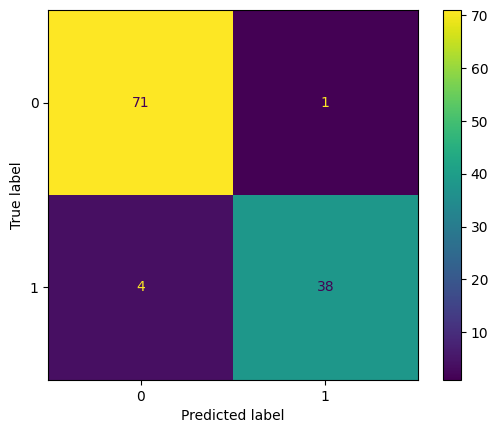

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [57]:
# Prediction


#take x variable and convert into numpy array
patient3 = np.array([10.76,
                     24.54, 
                     47.92,
                     181.0,
                     0.05263,
                     0.04362,
                     0.00000,
                     0.00000,
                     1.1587,
                     0.05884,
                     0.3857,
                     2.428,
                     2.548,
                     19.15,
                     0.007189,
                     5.00466,
                     0,
                     0,
                     0.02676,
                     0.002783,
                     9.456,
                     40.37,
                     9.16,
                     268.6,
                     0.08996,
                     0.06444,
                     0.0000,
                     1.0000,
                     0.2871,
                     4.07039])

In [58]:
#reshape the prediction values and predict
pred3 = patient3.reshape(1,-1)
pred3 = classifier_rf.predict(pred3)
if pred3 == 0:
    print ('Patient has no cancer')
else:
    print ('Patient has cancer')

Patient has no cancer


c:\Users\ranaa\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
